In [49]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from rfpimp import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
for (dirpath, dirnames, filenames) in os.walk("Train"):
    for filename in filenames: 
            print(filename)

Data_Dictionary.xlsx
First_Health_Camp_Attended.csv
Health_Camp_Detail.csv
Patient_Profile.csv
Second_Health_Camp_Attended.csv
Third_Health_Camp_Attended.csv
Train.csv


In [3]:
df_train = pd.read_csv("Train/Train.csv")
df_train.nunique()

Patient_ID           29828
Health_Camp_ID          44
Registration_Date     1201
Var1                   127
Var2                    77
Var3                     2
Var4                     5
Var5                    30
dtype: int64

In [4]:
df_test = pd.read_csv("Test.csv")
df_test.nunique()

Patient_ID           15324
Health_Camp_ID          21
Registration_Date      375
Var1                    92
Var2                    69
Var3                     2
Var4                     8
Var5                    30
dtype: int64

In [5]:
pp = pd.read_csv("Train/Patient_Profile.csv")
pp.nunique()

Patient_ID           37633
Online_Follower          2
LinkedIn_Shared          2
Twitter_Shared           2
Facebook_Shared          2
Income                   8
Education_Score        228
Age                     51
First_Interaction     1476
City_Type                9
Employer_Category       14
dtype: int64

In [6]:
set(df_train["Patient_ID"]).issubset(set(pp["Patient_ID"]))

True

In [7]:
Hcamp = pd.read_csv("Train/Health_Camp_Detail.csv")
Hcamp.nunique()

Health_Camp_ID     65
Camp_Start_Date    58
Camp_End_Date      54
Category1           3
Category2           7
Category3           2
dtype: int64

In [8]:
set(df_test["Health_Camp_ID"]).issubset(set(Hcamp["Health_Camp_ID"]))

True

In [9]:
firstcamp = pd.read_csv("Train/First_Health_Camp_Attended.csv")
firstcamp.nunique()

Patient_ID        3548
Health_Camp_ID      34
Donation            24
Health_Score      3826
Unnamed: 4           0
dtype: int64

In [10]:
secondcamp = pd.read_csv("Train/Second_Health_Camp_Attended.csv")
secondcamp.nunique()

Patient_ID        6123
Health_Camp_ID       6
Health Score       208
dtype: int64

In [11]:
thirdcamp = pd.read_csv("Train/Third_Health_Camp_Attended.csv")
thirdcamp.nunique()

Patient_ID                   5340
Health_Camp_ID                  4
Number_of_stall_visited         8
Last_Stall_Visited_Number       8
dtype: int64

In [12]:
set(thirdcamp["Patient_ID"]).issubset(set(pp["Patient_ID"]))

True

In [13]:
df_train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7
...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0
75274,511952,6528,13-Feb-06,0,0,0,0,0
75275,521236,6554,24-May-05,0,0,0,0,0
75276,518817,6580,22-Dec-04,0,0,0,0,0


In [14]:
df_test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0
...,...,...,...,...,...,...,...,...
35244,507261,6525,13-Apr-06,12,2,0,0,6
35245,513607,6551,03-Nov-06,0,0,0,0,0
35246,498160,6584,17-Jun-06,0,0,0,0,0
35247,502444,6567,13-Jan-07,0,0,0,0,0


In [15]:
hc = pd.read_csv("Train/Health_Camp_Detail.csv")

In [16]:
hc.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [17]:
df_train = pd.merge(df_train,pp,on=["Patient_ID"],how="left")
df_train = pd.merge(df_train,firstcamp,on=["Patient_ID","Health_Camp_ID"],how="left")
df_train = pd.merge(df_train,secondcamp,on=["Patient_ID","Health_Camp_ID"],how="left")
df_train = pd.merge(df_train,thirdcamp,on=["Patient_ID","Health_Camp_ID"],how="left")
df_train = pd.merge(df_train,hc,on=["Health_Camp_ID"],how="left")
df_train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1,75,40,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,None,None,None,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1,70,40,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0,0,0,0,0,None,None,None,14-Aug-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-Aug-04,12-Feb-05,First,F,2
75274,511952,6528,13-Feb-06,0,0,0,0,0,1,1,1,0,3,73,51,12-Sep-04,I,Real Estate,NaN,NaN,NaN,NaN,2.0,1.0,10-Feb-06,25-Apr-06,Third,G,2
75275,521236,6554,24-May-05,0,0,0,0,0,0,0,0,0,1,92,37,11-May-05,G,Software Industry,20.0,0.927746,NaN,NaN,NaN,NaN,19-Jun-05,01-Jul-05,First,B,2
75276,518817,6580,22-Dec-04,0,0,0,0,0,0,0,0,0,3,76,44,24-Sep-04,E,Technology,NaN,NaN,NaN,NaN,NaN,NaN,22-Dec-04,06-Jan-05,First,E,2


In [18]:
df_test = pd.merge(df_test,pp,on=["Patient_ID"],how="left")
df_test = pd.merge(df_test,firstcamp,on=["Patient_ID","Health_Camp_ID"],how="left")
df_test = pd.merge(df_test,secondcamp,on=["Patient_ID","Health_Camp_ID"],how="left")
df_test = pd.merge(df_test,thirdcamp,on=["Patient_ID","Health_Camp_ID"],how="left")
df_test = pd.merge(df_test,hc,on=["Health_Camp_ID"],how="left")
df_test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,505701,6548,21-May-06,1,0,0,0,2,0,0,0,0,0,None,44,05-Feb-03,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-Jun-06,18-Aug-06,Third,G,2
1,500633,6584,02-Jun-06,0,0,0,0,0,0,1,0,0,1,67,41,11-Dec-04,D,Consulting,NaN,NaN,NaN,NaN,NaN,NaN,04-Aug-06,09-Aug-06,Second,A,2
2,506945,6582,10-Aug-06,0,0,0,0,0,0,0,0,0,None,None,None,19-Apr-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-Apr-06,07-Nov-07,First,F,2
3,497447,6551,27-Aug-06,0,0,0,0,0,0,0,0,0,0,None,47,25-Aug-06,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-Nov-06,18-Nov-06,Second,D,2
4,496446,6533,19-Sep-06,0,0,0,0,0,0,0,0,0,None,None,None,19-Sep-06,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Sep-06,23-Sep-06,First,E,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35244,507261,6525,13-Apr-06,12,2,0,0,6,0,0,1,1,1,None,37,17-Feb-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-Apr-06,17-Apr-06,First,C,2
35245,513607,6551,03-Nov-06,0,0,0,0,0,0,0,0,0,None,None,None,14-Sep-05,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-Nov-06,18-Nov-06,Second,D,2
35246,498160,6584,17-Jun-06,0,0,0,0,0,0,0,0,0,None,None,None,11-Jun-04,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04-Aug-06,09-Aug-06,Second,A,2
35247,502444,6567,13-Jan-07,0,0,0,0,0,0,0,0,0,None,None,None,04-May-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Jan-07,04-Feb-07,Second,D,2


# Features

In [19]:
df_train["Registration_Date"] = pd.to_datetime(df_train["Registration_Date"],dayfirst=True)
df_train["First_Interaction"] = pd.to_datetime(df_train["First_Interaction"],dayfirst=True)
df_train["Days_Before_Interact"] = df_train["Registration_Date"] - df_train["First_Interaction"]
df_train["Days_Before_Interact"] = df_train["Days_Before_Interact"].dt.days
df_train["Days_Before_Interact"] = df_train["Days_Before_Interact"].fillna(99999).astype(int)

df_train["Camp_Start_Date"] = pd.to_datetime(df_train["Camp_Start_Date"],dayfirst=True)
df_train["Camp_End_Date"] = pd.to_datetime(df_train["Camp_End_Date"],dayfirst=True)
df_train["Days_of_Camp"] =  df_train["Camp_End_Date"] - df_train["Camp_Start_Date"] 
df_train["Days_of_Camp"] = df_train["Days_of_Camp"].dt.days
df_train["Days_of_Camp"] = df_train["Days_of_Camp"].astype(int)


df_test["Registration_Date"] = pd.to_datetime(df_test["Registration_Date"],dayfirst=True)
df_test["First_Interaction"] = pd.to_datetime(df_test["First_Interaction"],dayfirst=True)
df_test["Days_Before_Interact"] = df_test["Registration_Date"] - df_train["First_Interaction"]
df_test["Days_Before_Interact"] = df_test["Days_Before_Interact"].dt.days
df_test["Days_Before_Interact"] = df_test["Days_Before_Interact"].fillna(99999).astype(int)

df_test["Camp_Start_Date"] = pd.to_datetime(df_test["Camp_Start_Date"],dayfirst=True)
df_test["Camp_End_Date"] = pd.to_datetime(df_test["Camp_End_Date"],dayfirst=True)
df_test["Days_of_Camp"] =  df_test["Camp_End_Date"] - df_test["Camp_Start_Date"] 
df_test["Days_of_Camp"] = df_test["Days_of_Camp"].dt.days
df_test["Days_of_Camp"] = df_test["Days_of_Camp"].astype(int)


df_train["Diff_CampStart_Registration"] = np.abs(df_train["Camp_Start_Date"] - df_train["Registration_Date"]).dt.days
df_test["Diff_CampStart_Registration"] = np.abs(df_test["Camp_Start_Date"] - df_test["Registration_Date"]).dt.days

df_train["Diff_CampEnd_Registration"] = np.abs(df_train["Camp_End_Date"] - df_train["Registration_Date"]).dt.days
df_test["Diff_CampEnd_Registration"] = np.abs(df_test["Camp_End_Date"] - df_test["Registration_Date"]).dt.days

df_train["Diff_CampStart_FirstInteraction"] = np.abs(df_train["Camp_Start_Date"] - df_train["First_Interaction"]).dt.days
df_test["Diff_CampStart_FirstInteraction"] = np.abs(df_test["Camp_Start_Date"] - df_test["First_Interaction"]).dt.days



In [20]:
def date_there(a,b,c):
    if a<b<c:
        return 1
    else:
        return 0
df_train["date_there_in"] = df_train.apply(lambda x:date_there(x["Camp_Start_Date"],
                                                               x["First_Interaction"],
                                                              x["Camp_End_Date"]),axis=1)
df_test["date_there_in"] = df_test.apply(lambda x:date_there(x["Camp_Start_Date"],
                                                               x["First_Interaction"],
                                                              x["Camp_End_Date"]),axis=1)

In [21]:
#----------------------------TRAIN----------------------------------
df_train["Registration_Date_Y"] = df_train["Registration_Date"].dt.year
df_train["Registration_Date_Y"] = df_train["Registration_Date_Y"].fillna(999).astype(int)


df_train["First_Interaction_Y"] = df_train["First_Interaction"].dt.year
df_train["First_Interaction_Y"] = df_train["First_Interaction_Y"].fillna(999).astype(int)

df_train["Camp_Start_Date_Y"] = df_train["Camp_Start_Date"].dt.year

#----------------------------TEST------------------------------------
df_test["Registration_Date_Y"] = df_test["Registration_Date"].dt.year
df_test["Registration_Date_Y"] = df_test["Registration_Date_Y"].fillna(999).astype(int)

df_test["First_Interaction_Y"] = df_test["First_Interaction"].dt.year
df_test["First_Interaction_Y"] = df_test["First_Interaction_Y"].fillna(999).astype(int)

df_test["Camp_Start_Date_Y"] = df_test["Camp_Start_Date"].dt.year


In [22]:
def getCountVar(compute_df, count_df, var_name, count_var="v1"):
    grouped_df = count_df.groupby(var_name, as_index=False).agg('size').reset_index()
    grouped_df.columns = [var_name, "var_count"]
    merged_df = pd.merge(compute_df, grouped_df, how="left", on=var_name)
    merged_df.fillna(-1, inplace=True)
    return list(merged_df["var_count"])
for col in ["Patient_ID", "Health_Camp_ID"]:
    print("Count : ", col)
    full_df = pd.concat([df_train, df_test])
    df_train["Count_"+col] = getCountVar(df_train, full_df, col)
    df_test["Count_"+col] = getCountVar(df_test, full_df, col)

Count :  Patient_ID
Count :  Health_Camp_ID


In [23]:
map1 = {'First': 1, 'Second': 2, 'Third': 3}
map2 = {'F': 1, 'E': 2,'A': 3,'G': 4,'D': 5,'B': 6,'C': 7}
map3 = {'Technology': 1, 'Software Industry': 2, 'Others': 3,
        'Consulting': 4, 'Education': 5, 'BFSI': 6, 'Retail': 7,
        'Manufacturing': 8, 'Health': 9, 'Transport': 10, 'Real Estate': 11,
        'Food': 12, 'Telecom': 12, 'Broadcasting': 14}
map4 = {-999: -999, 'B': 1, 'H': 2, 'D': 3, 'G': 4, 'C': 5,
        'E': 6, 'A': 7, 'I': 8, 'F': 9}


df_train["Category1"] = df_train["Category1"].map(map1)
df_test["Category1"] = df_test["Category1"].map(map1)

df_train["Category2"] = df_train["Category2"].map(map2)
df_test["Category2"] = df_test["Category2"].map(map2)

df_train["Employer_Category"] = df_train["Employer_Category"].map(map3)
df_test["Employer_Category"] = df_test["Employer_Category"].map(map3)

df_train["City_Type"] = df_train["City_Type"].map(map4)
df_test["City_Type"] = df_test["City_Type"].map(map4)

for df_tmp in [df_train, df_test]:
  for c in ['Health_Camp_ID']:
    # mapper = train
    df_tmp[c + '_freq'] = df_tmp[c].map(df_tmp[c].value_counts(normalize=True))
    
    
df_train["Income"] = df_train["Income"].str.replace("None","-999").astype(int)
df_train["Education_Score"] = df_train["Education_Score"].str.replace("None","-999").astype(float)
df_train["Age"] = df_train["Age"].str.replace("None","-999").astype(int)

df_test["Income"] = df_test["Income"].str.replace("None","-999").astype(int)
df_test["Education_Score"] = df_test["Education_Score"].str.replace("None","-999").astype(float)
df_test["Age"] = df_test["Age"].str.replace("None","-999").astype(int)

df_train['cat1_cat2'] = df_train['Category1'].astype(str) + '_' + df_train['Category2'].astype(str)
df_test['cat1_cat2'] = df_test['Category1'].astype(str) + '_' + df_test['Category2'].astype(str)

le = LabelEncoder()
df_train['cat1_cat2'] = le.fit_transform(df_train['cat1_cat2'])
df_test['cat1_cat2'] = le.transform(df_test['cat1_cat2'])

In [24]:
def get_outcome(q,r,s,t):
    if  (q>0) | (r>0) | (s>0) | (t>0):
        return 1
    else:
        return 0
df_train["outcome"] = df_train.apply(lambda x: get_outcome(x["Health_Score"],
                                                          x["Health Score"],x["Number_of_stall_visited"],
                                                          x["Last_Stall_Visited_Number"]),axis=1)

In [25]:
# df_train.to_csv("Train_update.csv",index=False)
# df_test.to_csv("Test_update.csv",index=False)

In [26]:
df_train.dtypes

Patient_ID                                  int64
Health_Camp_ID                              int64
Registration_Date                  datetime64[ns]
Var1                                        int64
Var2                                        int64
Var3                                        int64
Var4                                        int64
Var5                                        int64
Online_Follower                             int64
LinkedIn_Shared                             int64
Twitter_Shared                              int64
Facebook_Shared                             int64
Income                                      int32
Education_Score                           float64
Age                                         int32
First_Interaction                  datetime64[ns]
City_Type                                 float64
Employer_Category                         float64
Donation                                  float64
Health_Score                              float64


In [27]:
df_train["outcome"].value_counts()

0    54744
1    20534
Name: outcome, dtype: int64

In [28]:
display(df_train)
df_test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Days_Before_Interact,Days_of_Camp,Diff_CampStart_Registration,Diff_CampEnd_Registration,Diff_CampStart_FirstInteraction,date_there_in,Registration_Date_Y,First_Interaction_Y,Camp_Start_Date_Y,Count_Patient_ID,Count_Health_Camp_ID,Health_Camp_ID_freq,cat1_cat2,outcome
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,-999,-999.0,-999,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,3,4,2,278,59,25.0,34.0,253,0,2005,2004,2005,11,2837,0.037687,6,1
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75.0,40,2004-09-08,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,3,4,2,344,59,2.0,57.0,342,0,2005,2004,2005,26,2837,0.037687,6,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,2,3,2,676,751,194.0,557.0,482,0,2006,2004,2005,7,3597,0.047783,4,1
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,2004-02-07,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,1,2,2,0,17,6.0,11.0,6,1,2004,2004,2004,6,1882,0.025001,1,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70.0,40,2003-07-04,8.0,1.0,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,2,3,2,970,4,30.0,34.0,1000,0,2006,2003,2006,23,3823,0.050785,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,500969,6539,2005-01-03,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,2004-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-08-07,2005-02-12,1,1,2,142,189,149.0,40.0,7,1,2005,2004,2004,8,1992,0.026462,0,0
75274,511952,6528,2006-02-13,0,0,0,0,0,1,1,1,0,3,73.0,51,2004-09-12,8.0,11.0,NaN,NaN,NaN,NaN,2.0,1.0,2006-02-10,2006-04-25,3,4,2,519,74,3.0,71.0,516,0,2006,2004,2006,33,1744,0.023167,6,1
75275,521236,6554,2005-05-24,0,0,0,0,0,0,0,0,0,1,92.0,37,2005-05-11,4.0,2.0,20.0,0.927746,NaN,NaN,NaN,NaN,2005-06-19,2005-07-01,1,6,2,13,12,26.0,38.0,39,0,2005,2005,2005,7,2303,0.030593,2,1
75276,518817,6580,2004-12-22,0,0,0,0,0,0,0,0,0,3,76.0,44,2004-09-24,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2004-12-22,2005-01-06,1,2,2,89,15,0.0,15.0,89,0,2004,2004,2004,14,3517,0.046720,1,0


,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Days_Before_Interact,Days_of_Camp,Diff_CampStart_Registration,Diff_CampEnd_Registration,Diff_CampStart_FirstInteraction,date_there_in,Registration_Date_Y,First_Interaction_Y,Camp_Start_Date_Y,Count_Patient_ID,Count_Health_Camp_ID,Health_Camp_ID_freq,cat1_cat2
0,505701,6548,2006-05-21,1,0,0,0,2,0,0,0,0,0,-999.0,44,2003-02-05,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-06-13,2006-08-18,3,4,2,531,66,23,89,1224,0,2006,2003,2006,24,3020,0.085676,6
1,500633,6584,2006-06-02,0,0,0,0,0,0,1,0,0,1,67.0,41,2004-12-11,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2006-08-04,2006-08-09,2,3,2,632,5,63,68,601,0,2006,2004,2006,30,3041,0.086272,4
2,506945,6582,2006-08-10,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,2006-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-04-06,2007-11-07,1,1,2,779,580,126,454,13,1,2006,2006,2006,10,2763,0.078385,0
3,497447,6551,2006-08-27,0,0,0,0,0,0,0,0,0,0,-999.0,47,2006-08-25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-11-13,2006-11-18,2,5,2,932,5,78,83,80,0,2006,2006,2006,8,2180,0.061846,5
4,496446,6533,2006-09-19,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,2006-09-19,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-09-20,2006-09-23,1,2,2,1173,3,1,4,1,0,2006,2006,2006,2,377,0.010695,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35244,507261,6525,2006-04-13,12,2,0,0,6,0,0,1,1,1,-999.0,37,2004-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-04-08,2006-04-17,1,7,2,61,9,5,4,781,0,2006,2004,2006,26,166,0.004709,3
35245,513607,6551,2006-11-03,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,2005-09-14,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-11-13,2006-11-18,2,5,2,1289,5,10,15,425,0,2006,2005,2006,3,2180,0.061846,5
35246,498160,6584,2006-06-17,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,2004-06-11,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-08-04,2006-08-09,2,3,2,600,5,48,53,784,0,2006,2004,2006,16,3041,0.086272,4
35247,502444,6567,2007-01-13,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,2005-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-30,2007-02-04,2,5,2,1360,5,17,22,636,0,2007,2005,2007,5,2441,0.069250,5


## Dropping stuff

In [29]:
targetlist = ["Donation","Health_Score","Unnamed: 4","Health Score",
 "Number_of_stall_visited","Last_Stall_Visited_Number"]
df_train.drop(targetlist,axis=1,inplace=True)
df_test.drop(targetlist,axis=1,inplace=True)

In [30]:
# temp_drop = ["Patient_ID","Employer_Category","City_Type"]
# df_train.drop(temp_drop,axis=1,inplace=True)
# df_test.drop(temp_drop,axis=1,inplace=True)

In [31]:
drop_date = ["Registration_Date","First_Interaction","Camp_Start_Date","Camp_End_Date"]
df_train.drop(drop_date,axis=1,inplace=True)
df_test.drop(drop_date,axis=1,inplace=True)

In [32]:
df_train

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Days_Before_Interact,Days_of_Camp,Diff_CampStart_Registration,Diff_CampEnd_Registration,Diff_CampStart_FirstInteraction,date_there_in,Registration_Date_Y,First_Interaction_Y,Camp_Start_Date_Y,Count_Patient_ID,Count_Health_Camp_ID,Health_Camp_ID_freq,cat1_cat2,outcome
0,489652,6578,4,0,0,0,2,0,0,0,0,-999,-999.0,-999,NaN,NaN,3,4,2,278,59,25.0,34.0,253,0,2005,2004,2005,11,2837,0.037687,6,1
1,507246,6578,45,5,0,0,7,0,0,0,0,1,75.0,40,5.0,3.0,3,4,2,344,59,2.0,57.0,342,0,2005,2004,2005,26,2837,0.037687,6,0
2,523729,6534,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,NaN,NaN,2,3,2,676,751,194.0,557.0,482,0,2006,2004,2005,7,3597,0.047783,4,1
3,524931,6535,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,8.0,NaN,1,2,2,0,17,6.0,11.0,6,1,2004,2004,2004,6,1882,0.025001,1,0
4,521364,6529,15,1,0,0,7,0,0,0,1,1,70.0,40,8.0,1.0,2,3,2,970,4,30.0,34.0,1000,0,2006,2003,2006,23,3823,0.050785,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,500969,6539,0,0,0,0,0,0,0,0,0,-999,-999.0,-999,NaN,NaN,1,1,2,142,189,149.0,40.0,7,1,2005,2004,2004,8,1992,0.026462,0,0
75274,511952,6528,0,0,0,0,0,1,1,1,0,3,73.0,51,8.0,11.0,3,4,2,519,74,3.0,71.0,516,0,2006,2004,2006,33,1744,0.023167,6,1
75275,521236,6554,0,0,0,0,0,0,0,0,0,1,92.0,37,4.0,2.0,1,6,2,13,12,26.0,38.0,39,0,2005,2005,2005,7,2303,0.030593,2,1
75276,518817,6580,0,0,0,0,0,0,0,0,0,3,76.0,44,6.0,1.0,1,2,2,89,15,0.0,15.0,89,0,2004,2004,2004,14,3517,0.046720,1,0


In [52]:
df_train.fillna(-999,inplace=True)
df_test.fillna(-999,inplace=True)

In [60]:
x = df_train.drop("outcome",axis=1)
y = df_train["outcome"]

In [61]:
x["City_Type"]

0       -999.0
1          5.0
2       -999.0
3          8.0
4          8.0
         ...  
75273   -999.0
75274      8.0
75275      4.0
75276      6.0
75277   -999.0
Name: City_Type, Length: 75278, dtype: float64

In [62]:
from lightgbm import LGBMClassifier

In [122]:
lgb = LGBMClassifier(n_estimators=200,random_state = 27,learning_rate=0.04)
lgb.fit(x,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.04, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=27, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [71]:
lr = LogisticRegression(max_iter=4000,fit_intercept=True,C=0.7,class_weight={1:0.727224,0:0.272776})
lr.fit(x,y)

LogisticRegression(C=0.7, class_weight={0: 0.272776, 1: 0.727224}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

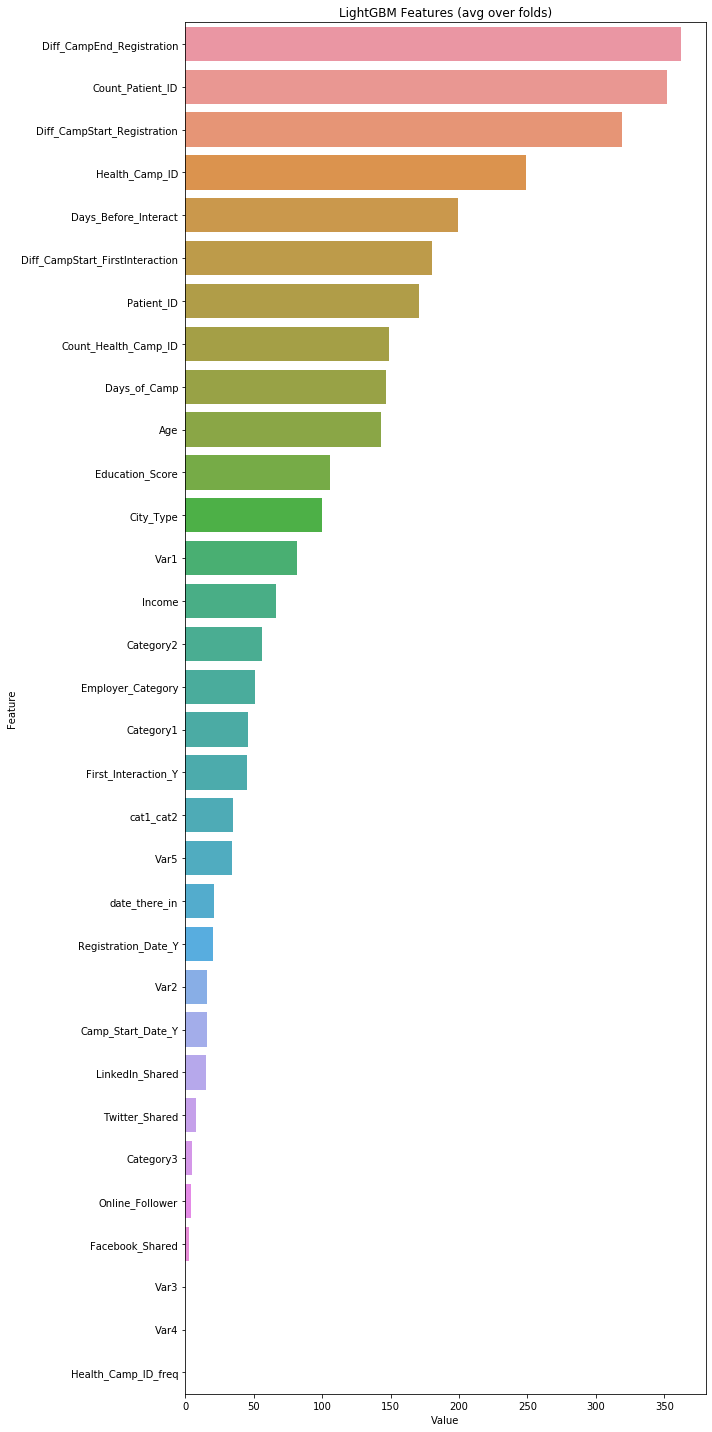

In [39]:
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_,x.columns)),
                           columns=['Value','Feature'])
plt.figure(figsize=(10, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [40]:
imp = importances(lgb,x,y)

In [41]:
imp

,Importance
Feature,
cat1_cat2,0.0706
Category1,0.0602
Days_of_Camp,0.0572
Diff_CampEnd_Registration,0.0314
Count_Patient_ID,0.0202
Age,0.0046
Health_Camp_ID,0.0042
Education_Score,0.0038
Category2,0.0034


In [123]:
preds = lgb.predict_proba(df_test)
# preds = lr.predict_proba(df_test)

In [124]:
sub = pd.read_csv("sample_submmission.csv")

In [125]:
sub

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.5
1,500633,6584,0.5
2,506945,6582,0.5
3,497447,6551,0.5
4,496446,6533,0.5
...,...,...,...
35244,507261,6525,0.5
35245,513607,6551,0.5
35246,498160,6584,0.5
35247,502444,6567,0.5


In [126]:
sub["Outcome"] = preds[:,1]

In [127]:
sub

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.655539
1,500633,6584,0.474485
2,506945,6582,0.081684
3,497447,6551,0.371846
4,496446,6533,0.097837
...,...,...,...
35244,507261,6525,0.415974
35245,513607,6551,0.283110
35246,498160,6584,0.319186
35247,502444,6567,0.317807


In [128]:
sub.to_csv("submit2.csv",index=False)

# Ensemble

In [87]:
#best logistic regression submission
predlr = pd.read_csv("BestLR.csv")
#best LGBM submission
predlgb = pd.read_csv("BestLGBM.csv")

In [112]:
sub["Outcome"] = predlr["Outcome"]*0.3 + predlgb["Outcome"]*0.8

In [113]:
sub

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.788642
1,500633,6584,0.597169
2,506945,6582,0.141682
3,497447,6551,0.609463
4,496446,6533,0.111815
...,...,...,...
35244,507261,6525,0.484423
35245,513607,6551,0.482451
35246,498160,6584,0.421938
35247,502444,6567,0.487997


In [114]:
sub.to_csv("final.csv",index=False)